# Logistic Regression

## Automotive Crash Test

* Automotive Crash Testing is a destructive testing that is performed in order to ensure high saftey standards for various cars
* Evaluation is done on a defined scale **{Poor: -10 to Execellent: 10}** on:
    * Manikin head impact
    * Manikin body impact
    * Interior impact
    * HVAC impact
    * Safety alarm system
* Each crash test is very expensive
* Crash Test was performed for only 100 cars
* Types of Car:
    * Hatchback
    * SUV
* Model required to predict the type of car in future

## Analysis

* Data of 80 cars will be taken as **training** data and rest 20 will be taken as **test** data

## Loading of data and libraries

In [25]:
library('caret')
crashTest_1 = read.csv("crashTest_1.csv", row.names = 1)
crashTest_1_TEST = read.csv("crashTest_1_TEST.csv", row.names = 1)

In [26]:
head(crashTest_1)
head(crashTest_1_TEST)

ManHI,ManBI,IntI,HVACi,Safety,CarType
-5.27,-1.30,2.86,-4.85,4.04,SUV
-4.82,-5.38,9.72,-0.97,-4.57,Hatchback
9.57,-7.50,-7.61,1.33,-5.10,Hatchback
2.84,-2.85,0.92,5.51,-6.64,Hatchback
0.00,2.68,-4.15,0.85,5.58,SUV
0.40,6.34,0.83,5.03,-8.10,SUV


,ManHI,ManBI,IntI,HVACi,Safety,CarType
81,1.94,2.21,3.38,1.78,-7.19,Hatchback
82,-0.02,-3.33,0.79,-6.63,7.99,SUV
83,-0.49,-4.48,5.00,8.33,-2.77,Hatchback
84,5.76,1.35,7.92,-0.43,4.29,Hatchback
85,2.51,-8.74,4.53,-1.91,3.95,Hatchback
86,-4.47,8.42,-0.05,5.57,9.62,Hatchback


In [27]:
str(crashTest_1)

'data.frame':	80 obs. of  6 variables:
 $ ManHI  : num  -5.27 -4.82 9.57 2.84 0 0.4 5.94 5.78 0.86 7.36 ...
 $ ManBI  : num  -1.3 -5.38 -7.5 -2.85 2.68 6.34 3.14 -1.75 -4.32 7.42 ...
 $ IntI   : num  2.86 9.72 -7.61 0.92 -4.15 0.83 -6.65 -6.85 8.1 0.27 ...
 $ HVACi  : num  -4.85 -0.97 1.33 5.51 0.85 5.03 6.62 0.73 -8.96 -8.62 ...
 $ Safety : num  4.04 -4.57 -5.1 -6.64 5.58 -8.1 -1.32 5.5 3.1 3.08 ...
 $ CarType: Factor w/ 2 levels "Hatchback","SUV": 2 1 1 1 2 2 1 1 1 2 ...


In [28]:
summary(crashTest_1)

     ManHI             ManBI              IntI             HVACi        
 Min.   :-9.9300   Min.   :-9.9400   Min.   :-9.9900   Min.   :-9.8200  
 1st Qu.:-5.1950   1st Qu.:-5.7050   1st Qu.:-5.5725   1st Qu.:-5.6750  
 Median : 0.6350   Median :-1.8150   Median :-0.4150   Median : 0.8700  
 Mean   :-0.0935   Mean   :-0.9277   Mean   :-0.1349   Mean   : 0.1197  
 3rd Qu.: 5.0500   3rd Qu.: 3.4175   3rd Qu.: 4.9775   3rd Qu.: 5.0625  
 Max.   : 9.5700   Max.   : 9.6100   Max.   : 9.7200   Max.   : 9.8900  
     Safety             CarType  
 Min.   :-9.8000   Hatchback:50  
 1st Qu.:-4.6775   SUV      :30  
 Median : 0.8300                 
 Mean   : 0.5437                 
 3rd Qu.: 4.6225                 
 Max.   : 9.9900                 

## Building Model

In [29]:
logisfit = glm(formula = crashTest_1$CarType~., data = crashTest_1, family = "binomial")
logisfit

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:  glm(formula = crashTest_1$CarType ~ ., family = "binomial", data = crashTest_1)

Coefficients:
(Intercept)        ManHI        ManBI         IntI        HVACi       Safety  
     -22.76       -13.48        36.02       -44.90       -58.50       -27.36  

Degrees of Freedom: 79 Total (i.e. Null);  74 Residual
Null Deviance:	    105.9 
Residual Deviance: 5.359e-08 	AIC: 12

In [30]:
summary(logisfit)


Call:
glm(formula = crashTest_1$CarType ~ ., family = "binomial", data = crashTest_1)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.316e-04  -2.100e-08  -2.100e-08   2.100e-08   1.266e-04  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)   -22.76   12007.54  -0.002    0.998
ManHI         -13.48    3077.29  -0.004    0.997
ManBI          36.02    7221.18   0.005    0.996
IntI          -44.90    8853.08  -0.005    0.996
HVACi         -58.50   11461.92  -0.005    0.996
Safety        -27.36    5396.42  -0.005    0.996

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.0585e+02  on 79  degrees of freedom
Residual deviance: 5.3590e-08  on 74  degrees of freedom
AIC: 12

Number of Fisher Scoring iterations: 25


## Finding the odd

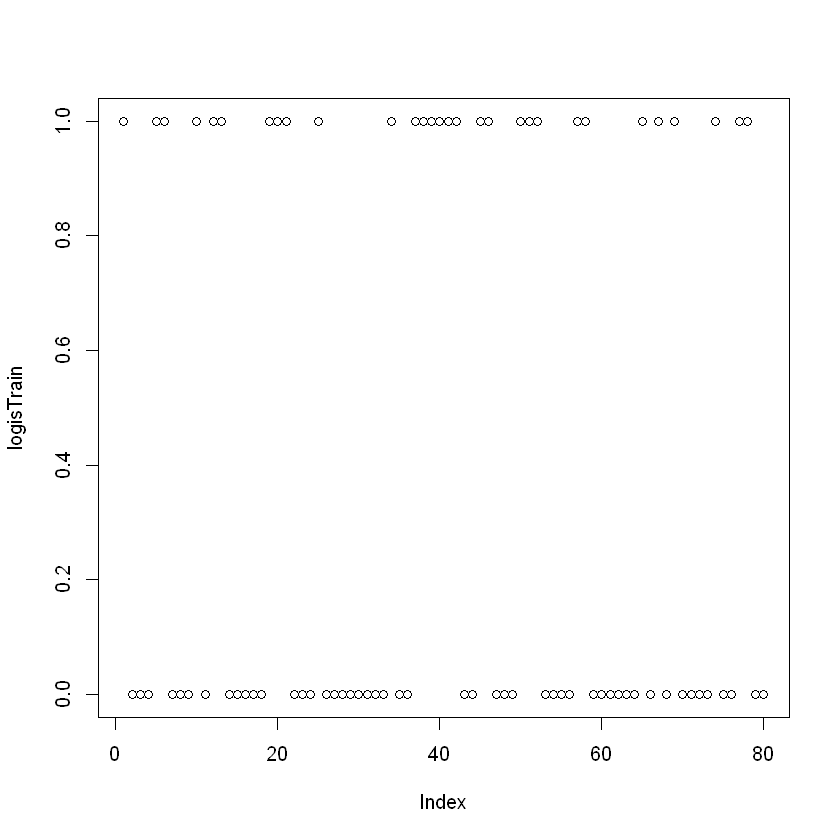

In [31]:
logisTrain = predict(logisfit, type = "response")
plot(logisTrain)

## Identifying probabilities with car types

In [32]:
tapply(logisTrain, crashTest_1$CarType, mean)

Hatchback          SUV 
2.851316e-10 1.000000e+00

## Predicting on Test Data

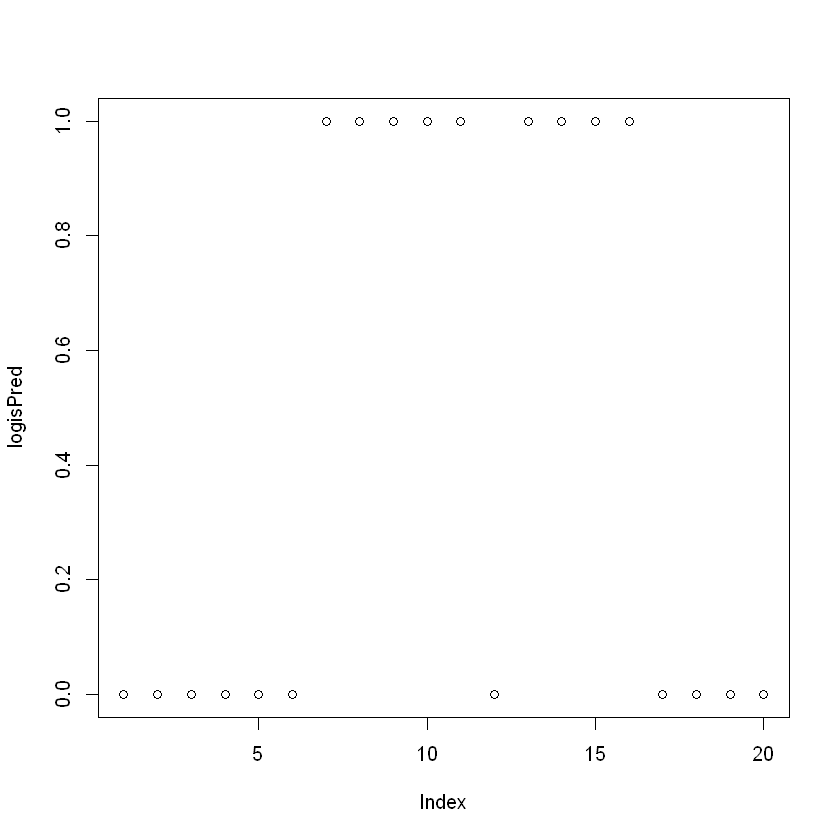

In [33]:
logisPred = predict(logisfit, newdata = crashTest_1_TEST, type='response')
plot(logisPred)

## Results

In [35]:
crashTest_1_TEST[logisPred<=0.5, "LogisPred"] = "Hatchback"
crashTest_1_TEST[logisPred>0.5, "LogisPred"] = "SUV"
head(crashTest_1_TEST)

,ManHI,ManBI,IntI,HVACi,Safety,CarType,LogisPred
81,1.94,2.21,3.38,1.78,-7.19,Hatchback,Hatchback
82,-0.02,-3.33,0.79,-6.63,7.99,SUV,Hatchback
83,-0.49,-4.48,5.00,8.33,-2.77,Hatchback,Hatchback
84,5.76,1.35,7.92,-0.43,4.29,Hatchback,Hatchback
85,2.51,-8.74,4.53,-1.91,3.95,Hatchback,Hatchback
86,-4.47,8.42,-0.05,5.57,9.62,Hatchback,Hatchback


In [37]:
confusionMatrix(table(crashTest_1_TEST[,7], crashTest_1_TEST[,6]), positive = 'Hatchback')

Confusion Matrix and Statistics

           
            Hatchback SUV
  Hatchback        10   1
  SUV               0   9
                                          
               Accuracy : 0.95            
                 95% CI : (0.7513, 0.9987)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : 2.003e-05       
                                          
                  Kappa : 0.9             
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 1.0000          
            Specificity : 0.9000          
         Pos Pred Value : 0.9091          
         Neg Pred Value : 1.0000          
             Prevalence : 0.5000          
         Detection Rate : 0.5000          
   Detection Prevalence : 0.5500          
      Balanced Accuracy : 0.9500          
                                          
       'Positive' Class : Hatchback       
                 

## Conclusion

* Model was able to predict all Hatchbacks correctly
* Model was able to predict 9 out of 10 SUVs correctly